In [1]:
import pandas as pd
import numpy as np

# Load Data
df = pd.read_csv('../data/train.csv')

print("="*50)
print("       INTENSIVE DATA HEALTH CHECK       ")
print("="*50)

# 1. Basic Info
print("\n--- 1. SHAPE & TYPES ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.info())

# 2. Missing Values Deep Dive
print("\n--- 2. MISSING VALUES BREAKDOWN ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent %': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percent %', ascending=False))

# 3. Duplicates
print("\n--- 3. DUPLICATE RECORDS ---")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# 4. Cardinality (Unique Values)
print("\n--- 4. UNIQUE VALUES (CARDINALITY) ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 5. Target Balance
print("\n--- 5. TARGET VARIABLE DISTRIBUTION ---")
print(df['retention_status'].value_counts(normalize=True) * 100)

# 6. Numerical Stats (Skewness check)
print("\n--- 6. NUMERICAL STATISTICS ---")
print(df.describe().T)

print("\n--- 7. CATEGORICAL BREAKDOWNS (Top 5 per col) ---")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col != 'retention_status':
        print(f"\n[{col} Top 5 Categories]")
        print(df[col].value_counts().head(5))

print("\n" + "="*50)
print("       END OF STATISTICAL REPORT       ")
print("="*50)

       INTENSIVE DATA HEALTH CHECK       

--- 1. SHAPE & TYPES ---
Rows: 59611, Columns: 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   founder_id                  59611 non-null  int64  
 1   founder_age                 59611 non-null  int64  
 2   founder_gender              59611 non-null  object 
 3   years_with_startup          59611 non-null  int64  
 4   founder_role                59611 non-null  object 
 5   monthly_revenue_generated   57811 non-null  float64
 6   work_life_balance_rating    49467 non-null  object 
 7   venture_satisfaction        52447 non-null  object 
 8   startup_performance_rating  59611 non-null  object 
 9   funding_rounds_led          59611 non-null  int64  
 10  working_overtime            59611 non-null  object 
 11  distance_from_investor_hub  59611 non-null  int64  


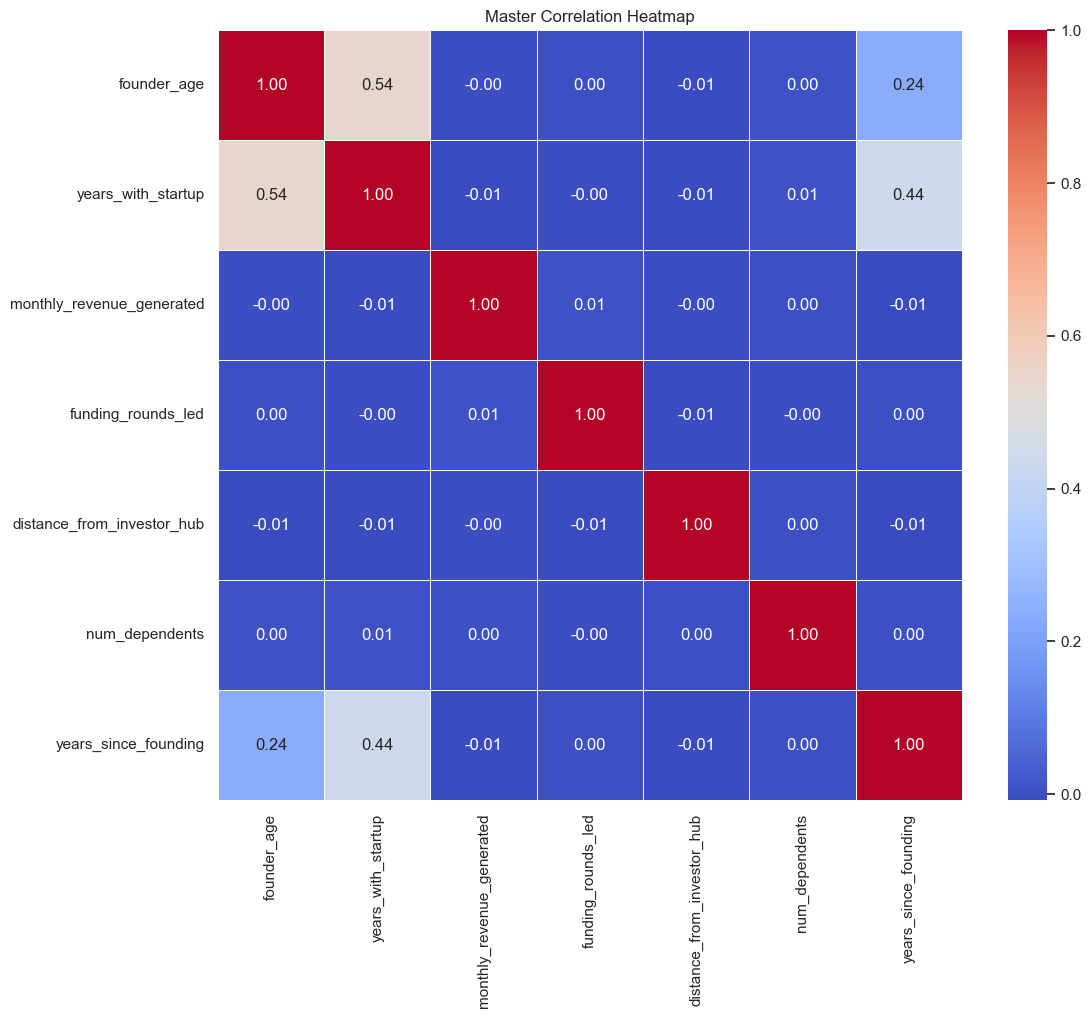

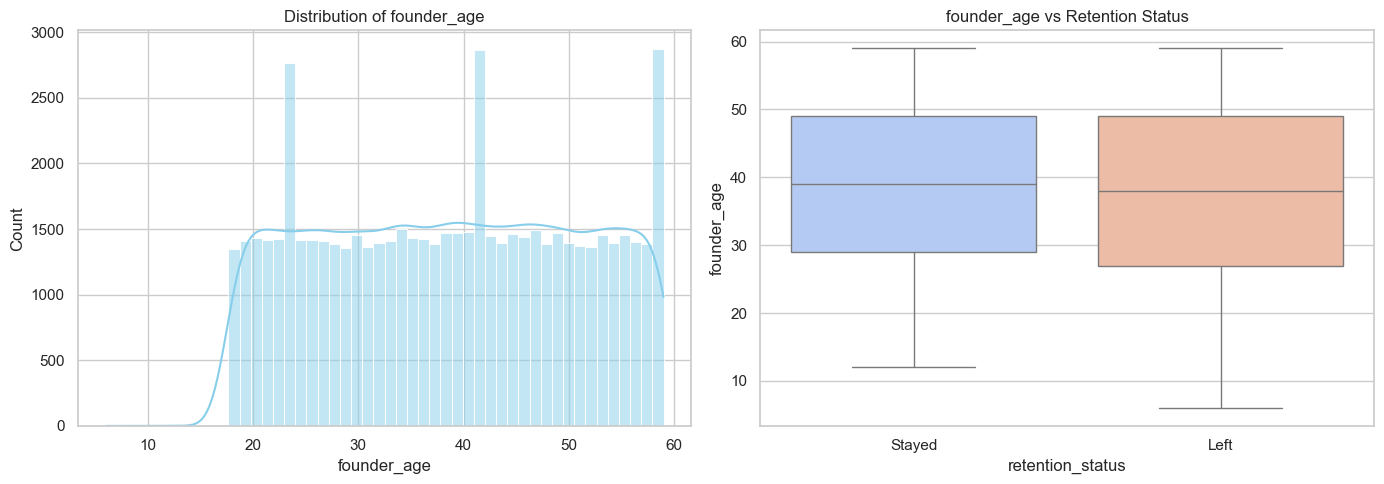

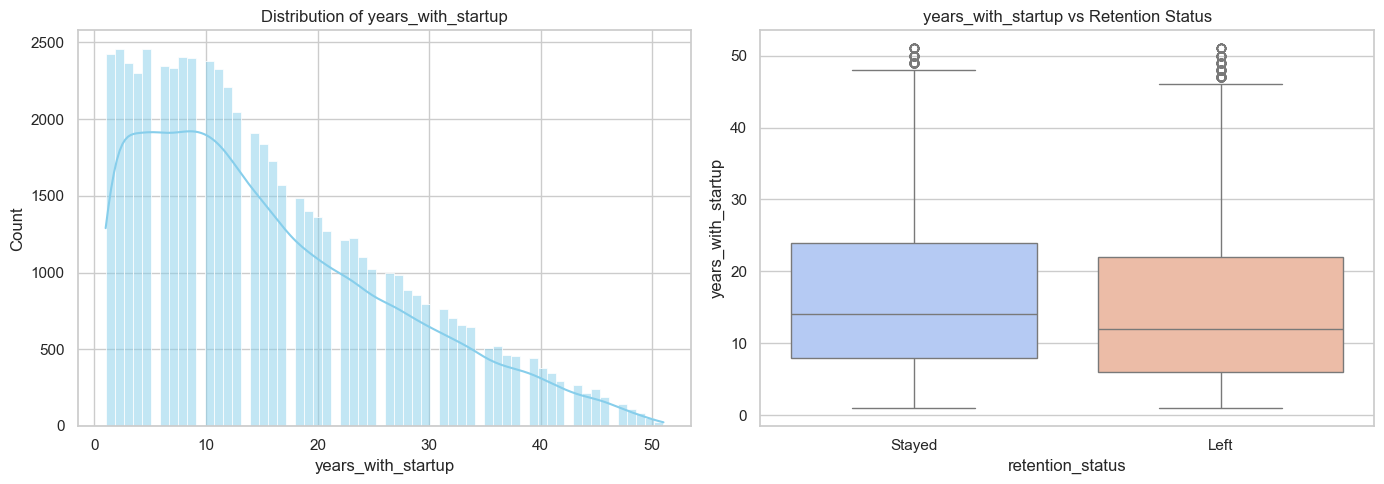

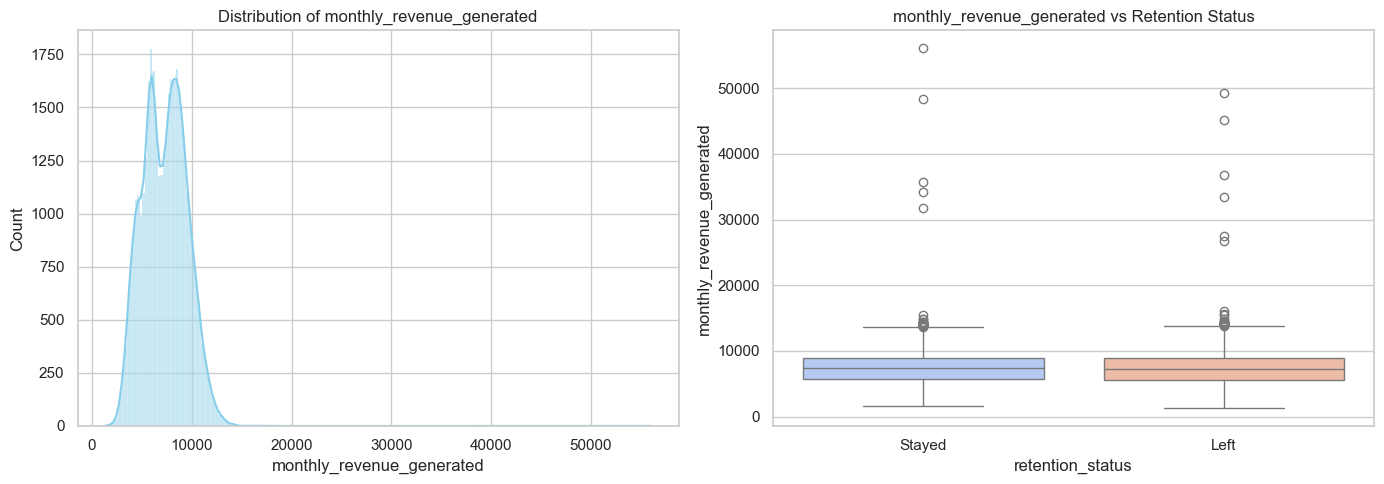

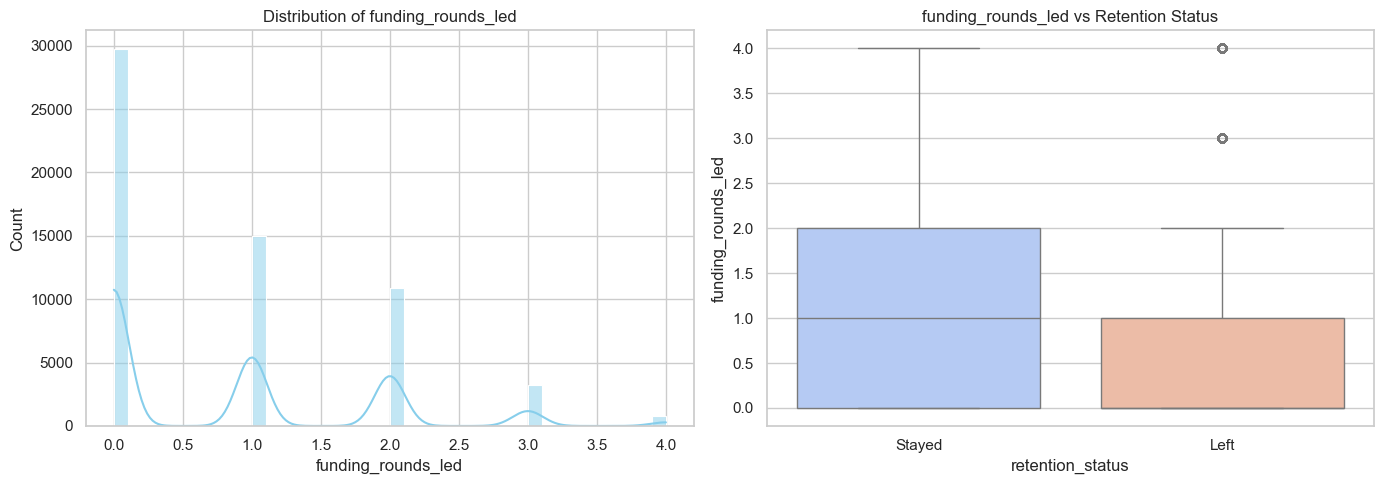

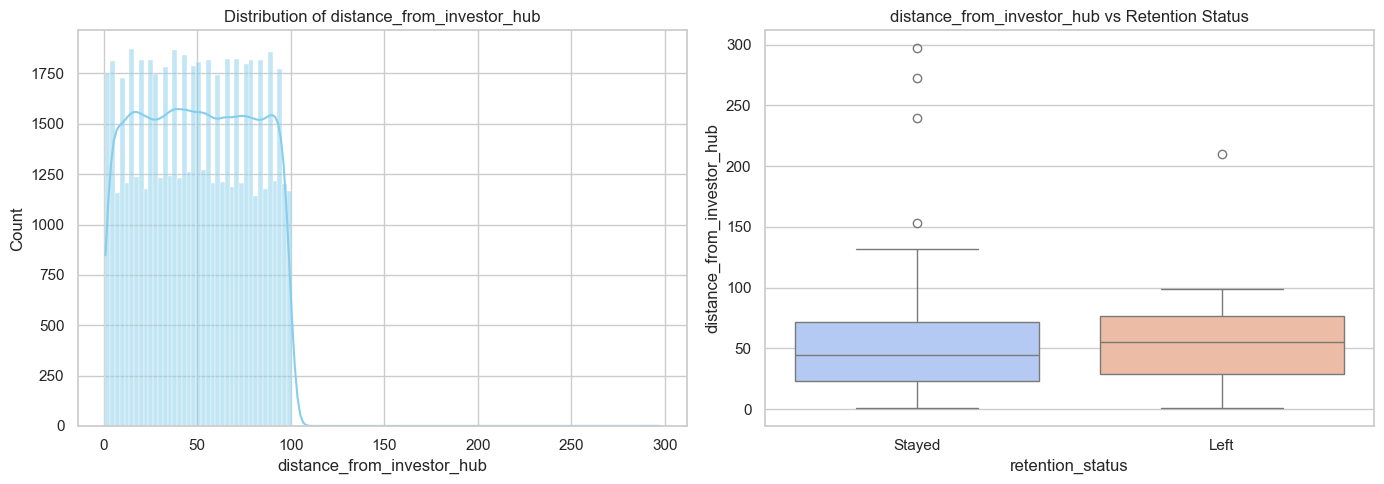

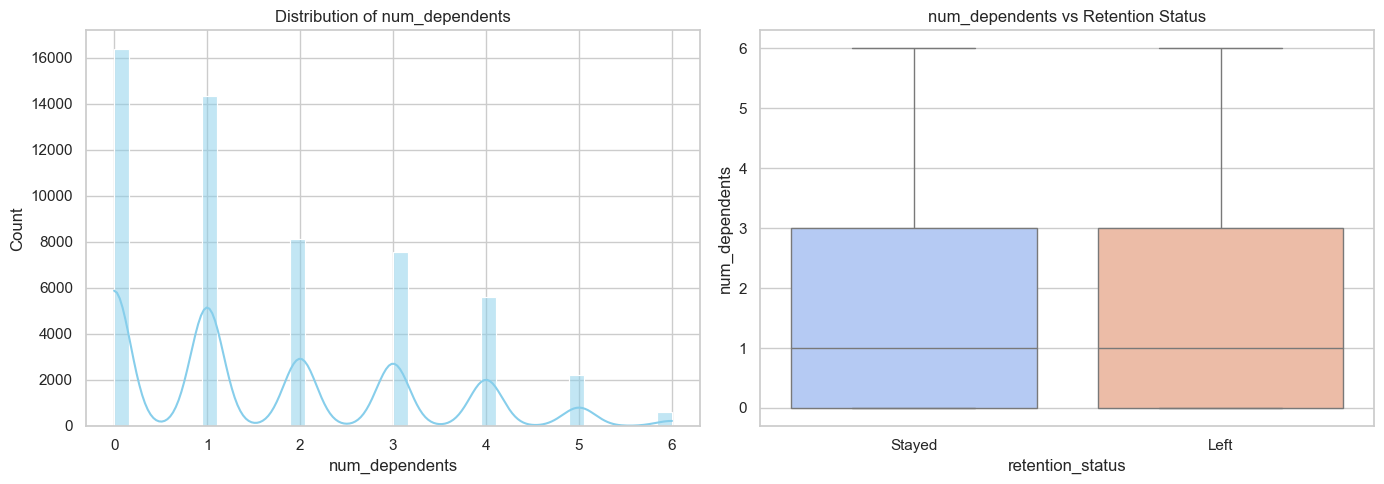

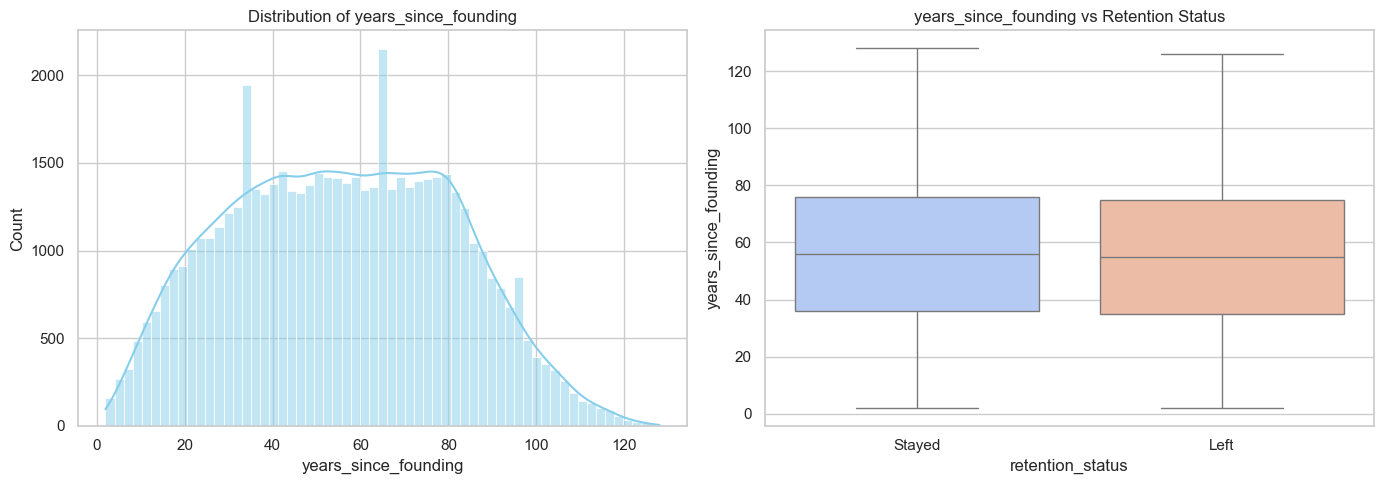

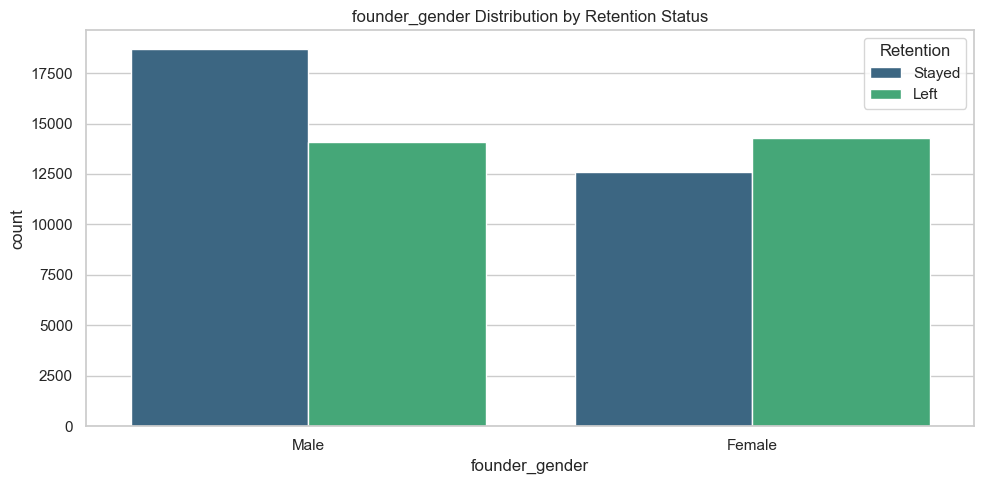

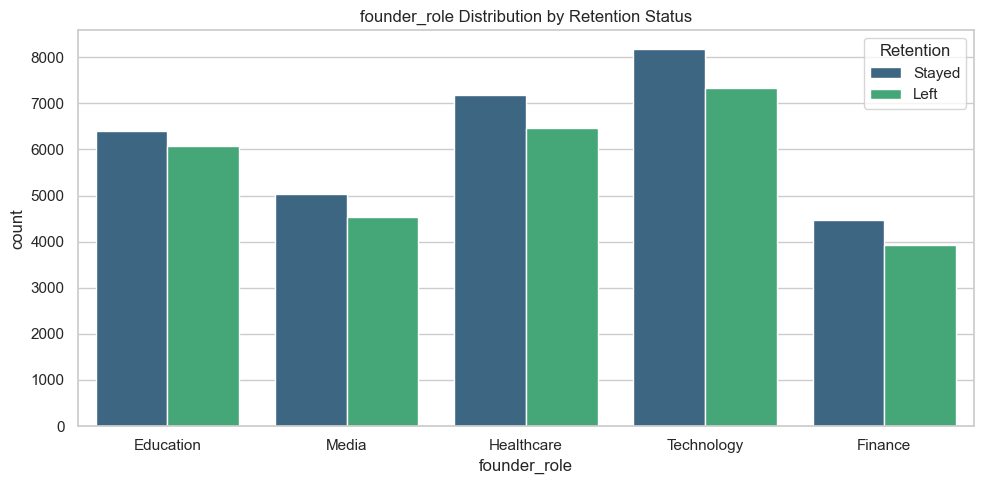

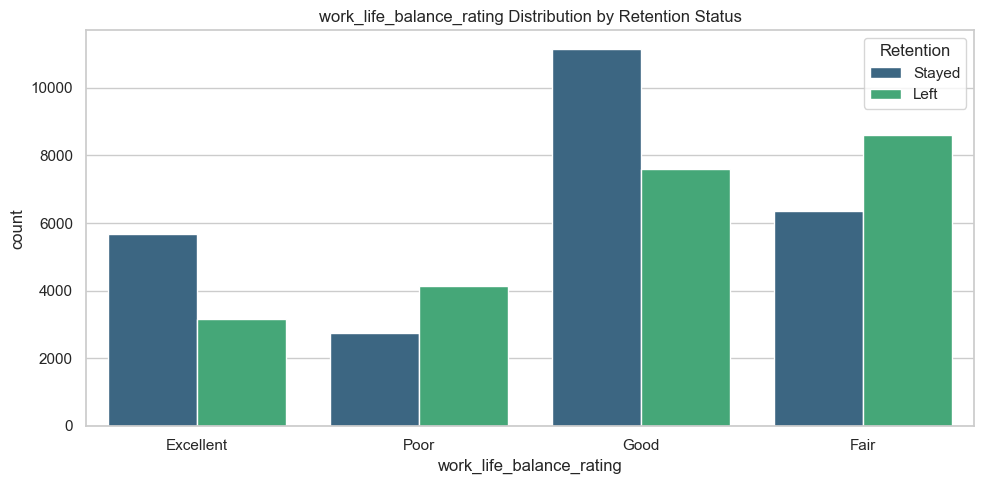

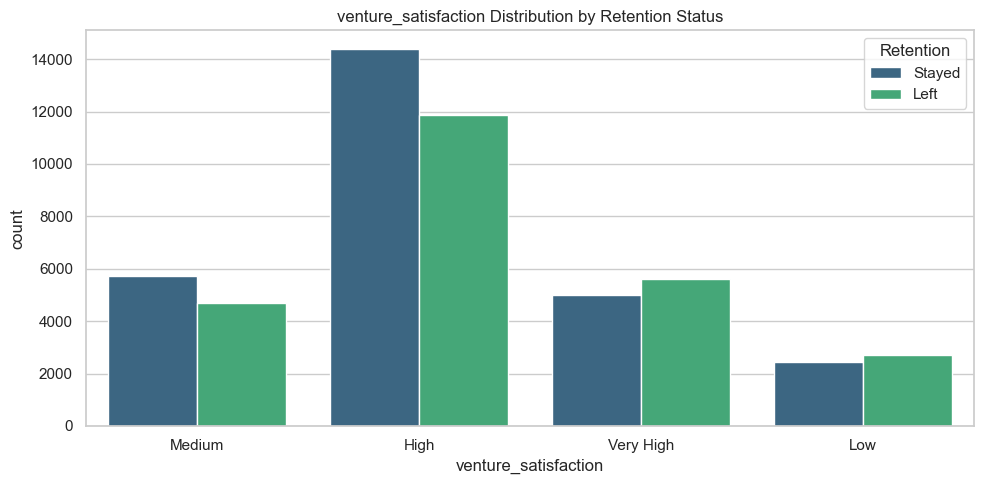

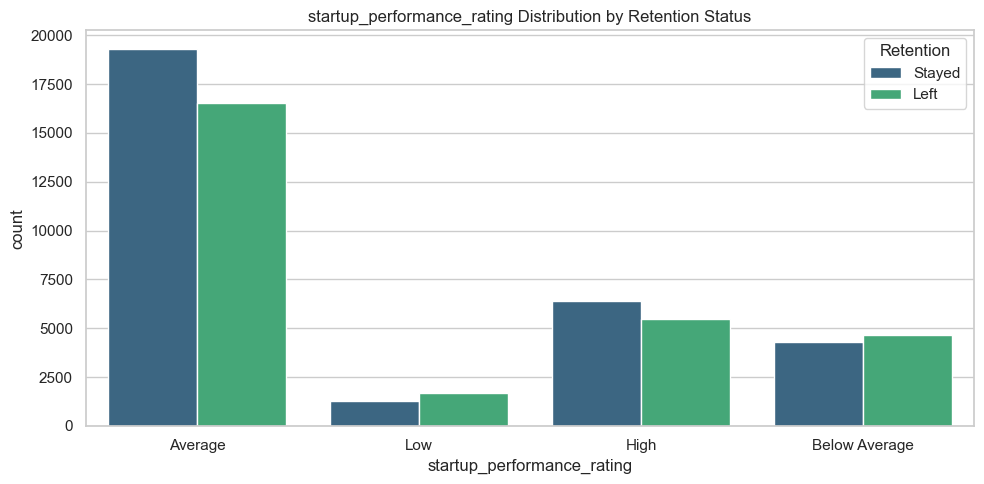

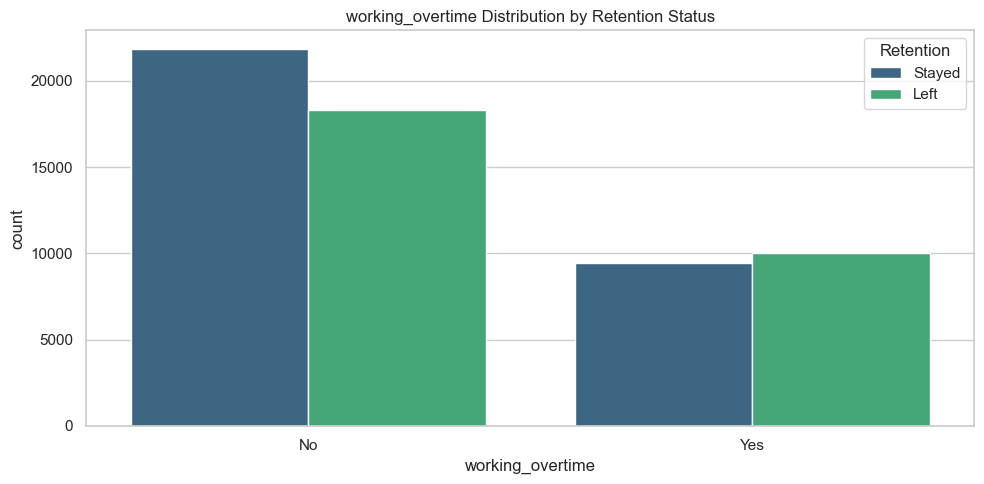

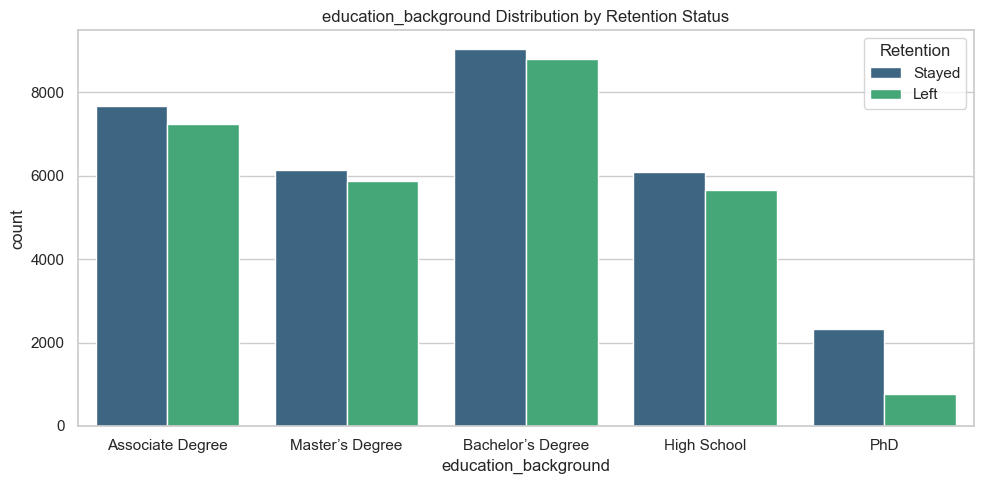

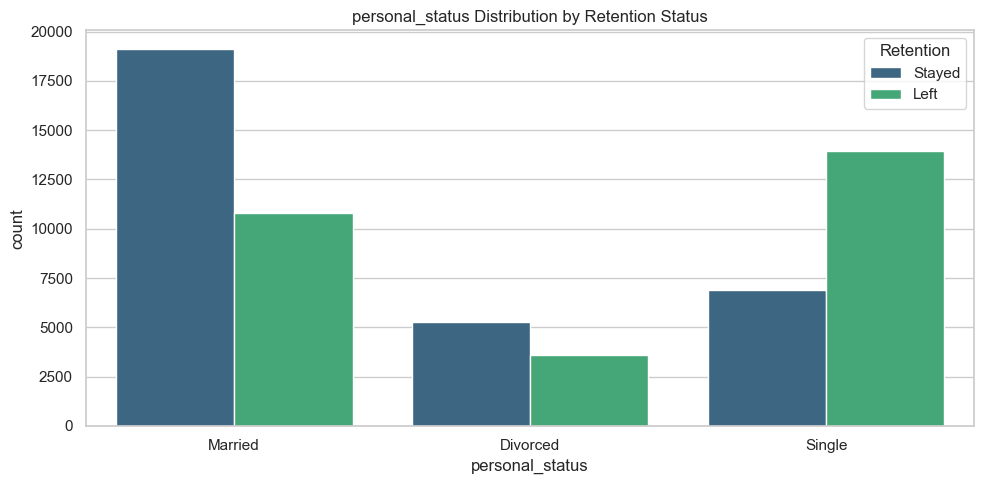

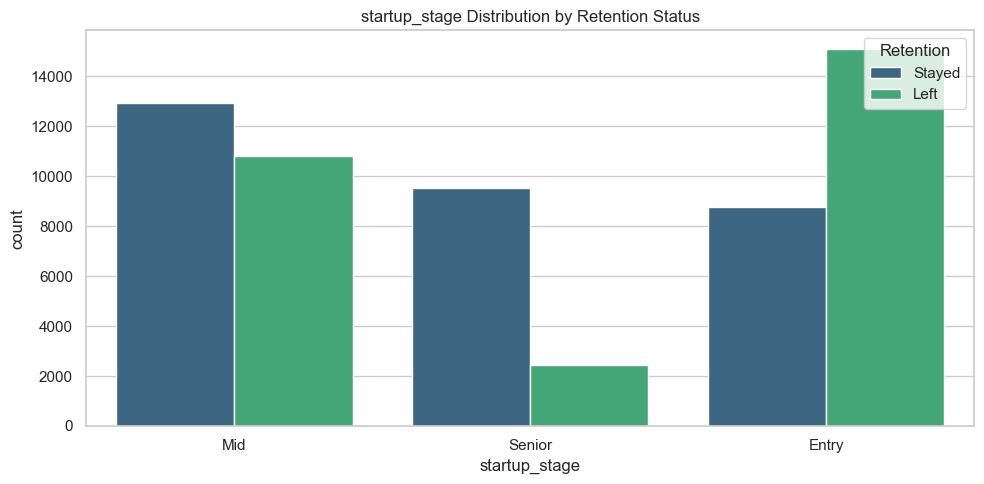

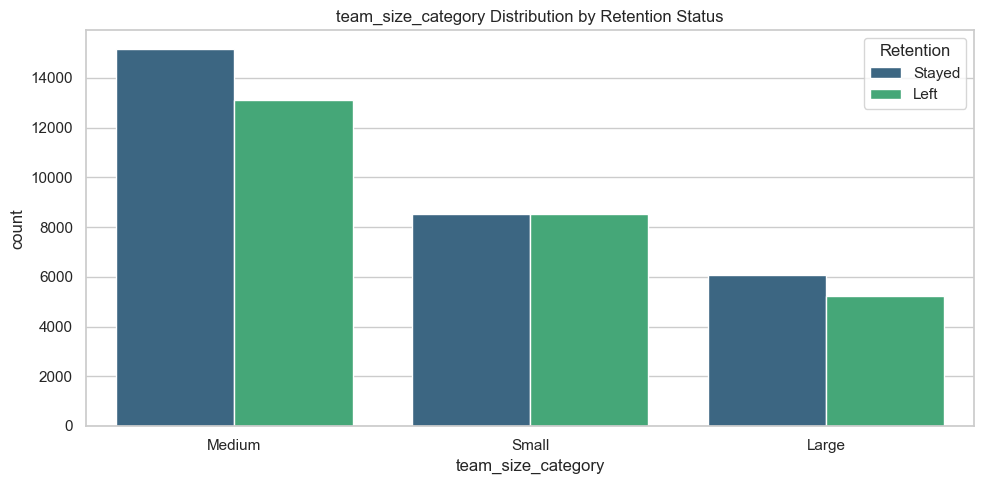

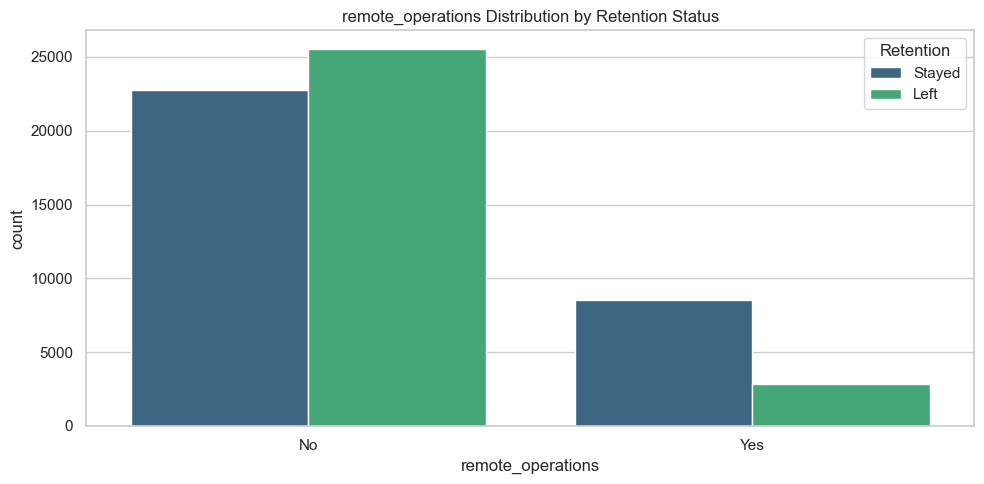

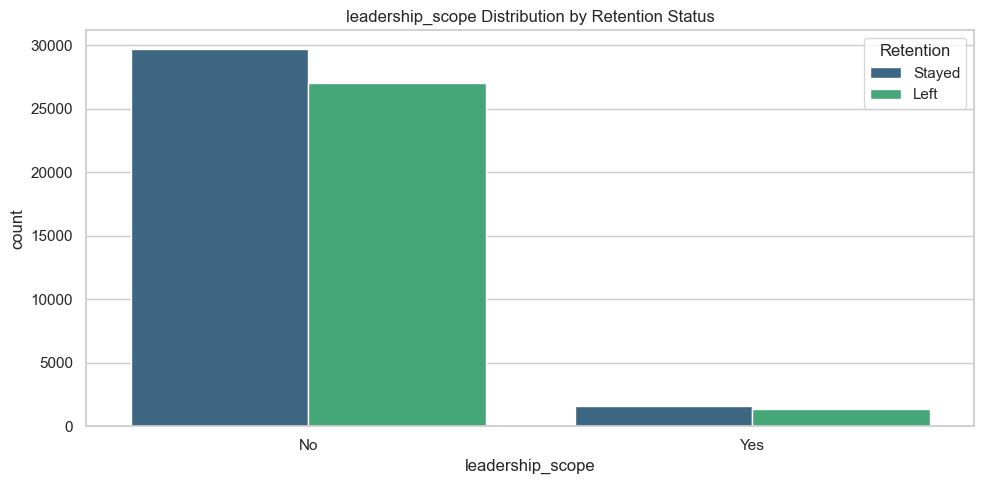

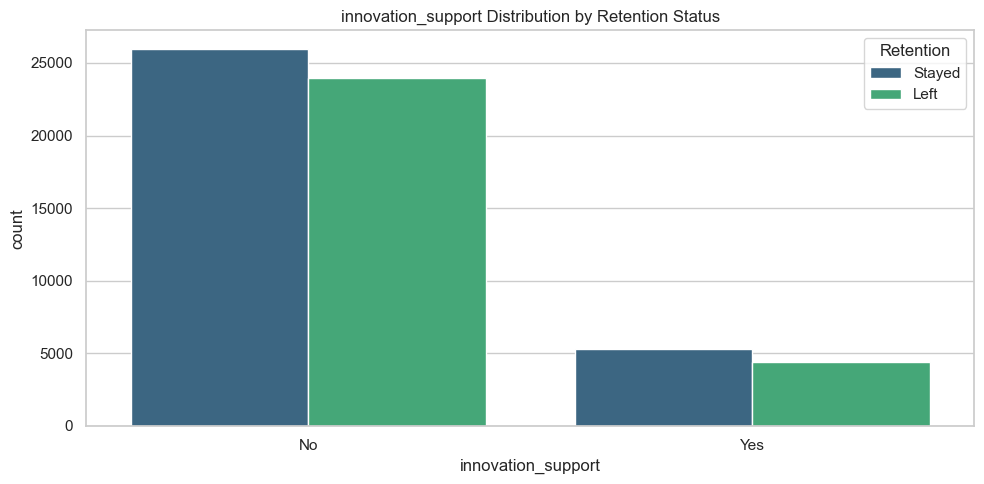

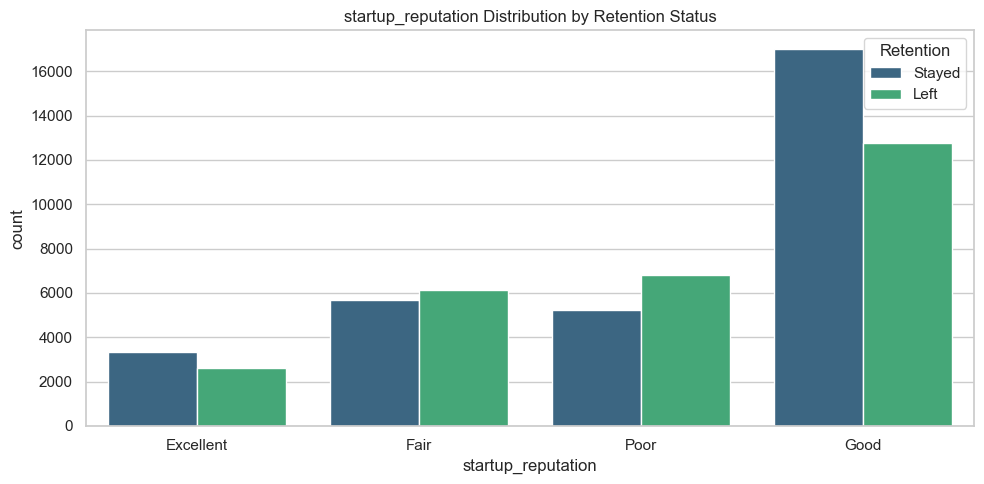

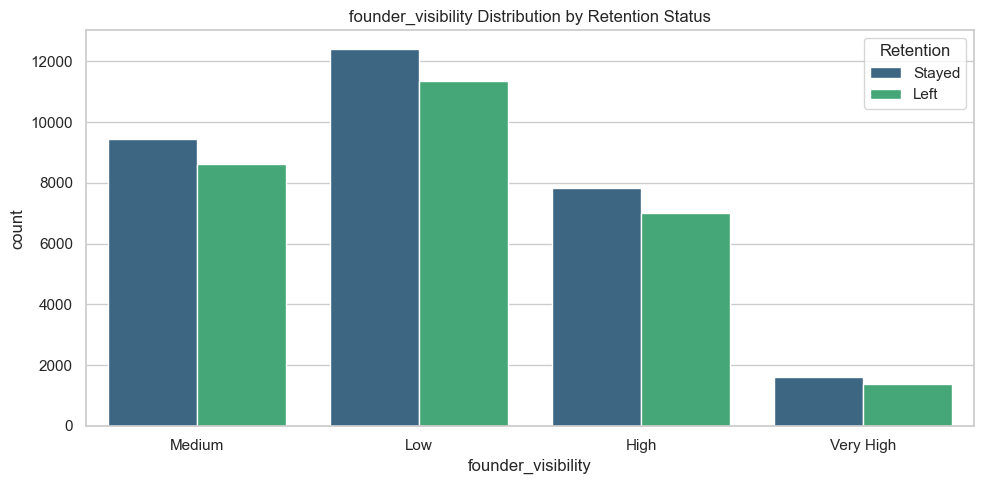

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
# Filter out ID column for plotting
plot_df = df.drop(columns=['founder_id'], errors='ignore')

# --- A. NUMERICAL VARIABLES ANALYSIS ---
num_cols = plot_df.select_dtypes(include=['float64', 'int64']).columns

# 1. Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(plot_df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Master Correlation Heatmap')
plt.show()

# 2. Distributions & Boxplots (Loop)
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram (Distribution)
    sns.histplot(data=plot_df, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    
    # Boxplot vs Target (Outliers & Separation)
    sns.boxplot(data=plot_df, x='retention_status', y=col, hue='retention_status', legend=False, palette='coolwarm', ax=axes[1])
    axes[1].set_title(f'{col} vs Retention Status')
    
    plt.tight_layout()
    plt.show()

# --- B. CATEGORICAL VARIABLES ANALYSIS ---
cat_cols = plot_df.select_dtypes(include=['object']).columns
# Remove target from this list so we don't plot it against itself
cat_cols = [c for c in cat_cols if c != 'retention_status']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    # Countplot split by Target
    # If too many categories, rotate x-axis
    if plot_df[col].nunique() > 10:
        plt.xticks(rotation=45, ha='right')
        
    sns.countplot(data=plot_df, x=col, hue='retention_status', palette='viridis')
    plt.title(f'{col} Distribution by Retention Status')
    plt.legend(title='Retention', loc='upper right')
    plt.tight_layout()
    plt.show()

Loading Dataset...
Data Loaded Successfully. Shape: (59611, 24)

      PART 1: NUMERICAL DISTRIBUTION & SKEW ANALYSIS

DISTRIBUTION HEALTH CHECK:
                            Skewness   Kurtosis  Null_Count  \
funding_rounds_led          0.993528   0.174850           0   
monthly_revenue_generated   0.799813  11.585181        1800   
years_with_startup          0.788235  -0.132108           0   
num_dependents              0.717575  -0.452917        4780   
years_since_founding        0.067646  -0.794293        4184   
distance_from_investor_hub  0.029041  -0.996028           0   
founder_age                -0.007497  -1.189341           0   

                                              Recommendation  
funding_rounds_led          Moderate Skew (Consider Scaling)  
monthly_revenue_generated   Moderate Skew (Consider Scaling)  
years_with_startup          Moderate Skew (Consider Scaling)  
num_dependents              Moderate Skew (Consider Scaling)  
years_since_founding          Norm

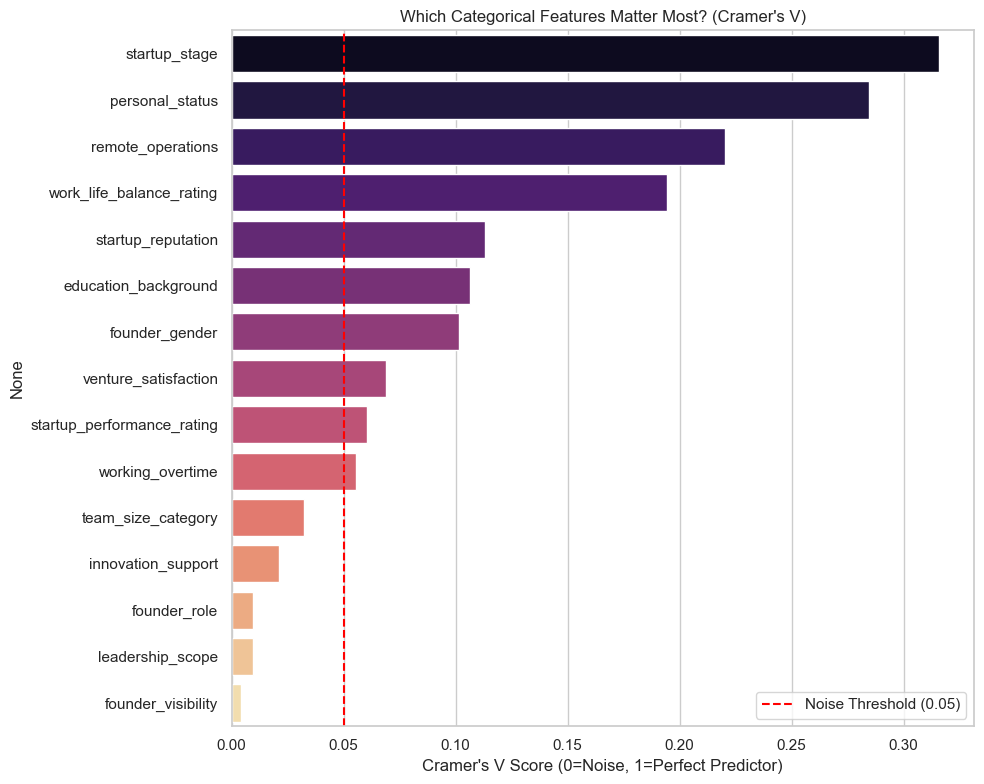


      PART 3: MULTIVARIATE INTERACTIONS & PATTERNS


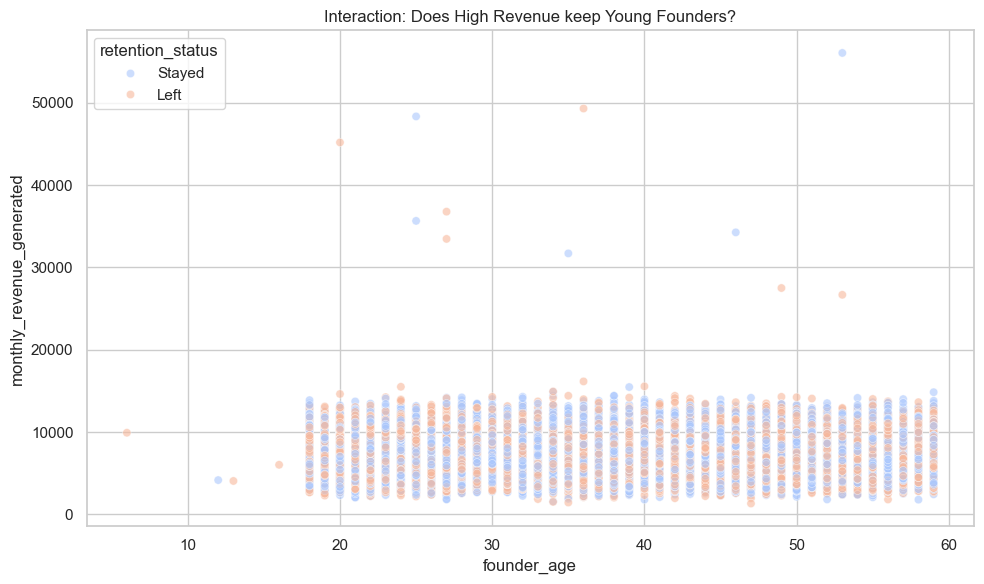

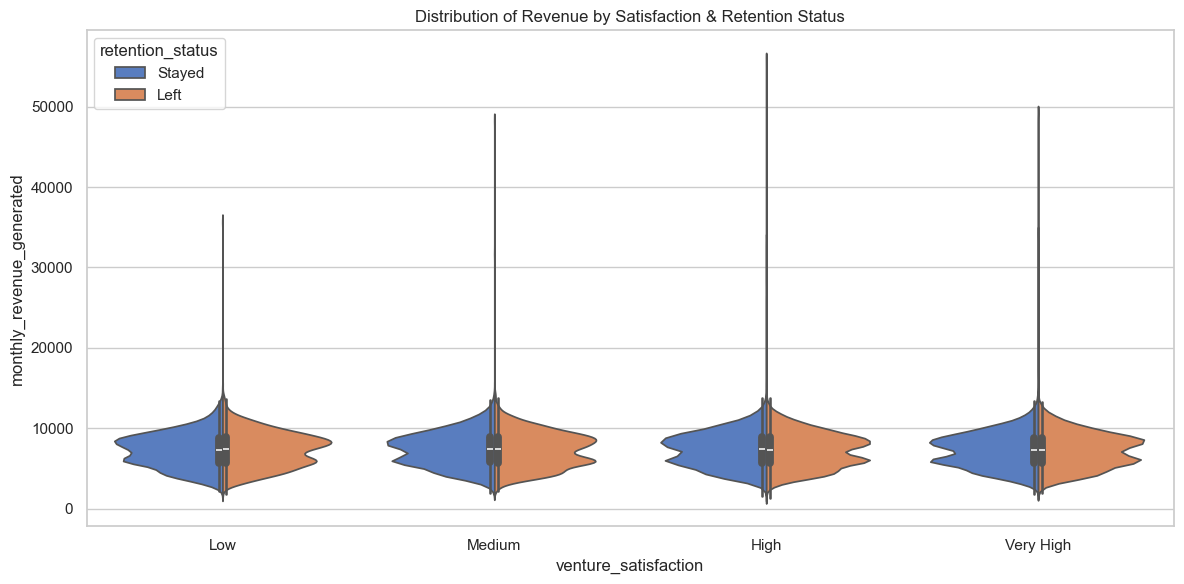

Generating Pairplot... (This might take a moment)


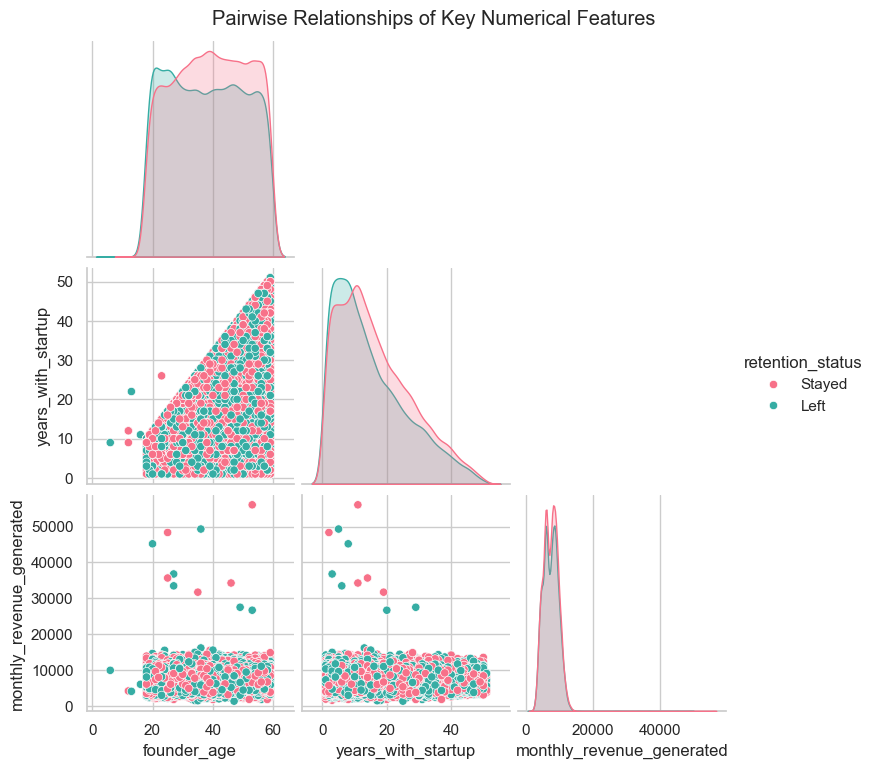


      EXTENSIVE EDA COMPLETE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


sns.set(style="whitegrid")

DATA_PATH = '../data/train.csv'

try:
    print("Loading Dataset...")
    df = pd.read_csv(DATA_PATH)
    print(f"Data Loaded Successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}. Please check the path.")
    exit()


print("\n" + "="*60)
print("      PART 1: NUMERICAL DISTRIBUTION & SKEW ANALYSIS")
print("="*60)

# Filter numerical columns (excluding ID)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = [c for c in num_cols if c != 'founder_id']

# Create summary table
dist_summary = pd.DataFrame(index=num_cols)
dist_summary['Skewness'] = df[num_cols].skew()
dist_summary['Kurtosis'] = df[num_cols].kurt()
dist_summary['Null_Count'] = df[num_cols].isnull().sum()

# Recommendation logic
def recommend_transform(row):
    if abs(row['Skewness']) > 1:
        return "Log/Power Transform Needed (High Skew)"
    elif abs(row['Skewness']) > 0.5:
        return "Moderate Skew (Consider Scaling)"
    else:
        return "Normal-ish (StandardScaler ok)"

dist_summary['Recommendation'] = dist_summary.apply(recommend_transform, axis=1)

print("\nDISTRIBUTION HEALTH CHECK:")
print(dist_summary.sort_values(by='Skewness', key=abs, ascending=False))


skewed_cols = dist_summary[dist_summary['Recommendation'].str.contains("Transform")].index.tolist()

if len(skewed_cols) > 0:
    print(f"\n[Visualizing Top Skewed Features]: {skewed_cols}")
    # Create a dynamic subplot layout
    rows = len(skewed_cols)
    plt.figure(figsize=(14, 5 * rows))
    
    for i, col in enumerate(skewed_cols):
        # 1. Histogram
        ax1 = plt.subplot(rows, 2, i*2 + 1)
        sns.histplot(df[col].dropna(), kde=True, color='purple', ax=ax1)
        ax1.set_title(f'{col} Distribution (Skew: {df[col].skew():.2f})')
        
        # 2. Q-Q Plot
        ax2 = plt.subplot(rows, 2, i*2 + 2)
        stats.probplot(df[col].dropna(), dist="norm", plot=ax2)
        ax2.set_title(f'{col} Q-Q Plot (Normality Check)')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo heavily skewed columns found (Skewness < 1.0).")



print("\n" + "="*60)
print("      PART 2: CATEGORICAL FEATURE STRENGTH (CRAMER'S V)")
print("="*60)

def cramers_v(x, y):
    """Calculates Cramer's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Handle division by zero edge cases
    if min((kcorr-1), (rcorr-1)) == 0:
        return 0.0
        
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Calculate Cramer's V for each column against 'retention_status'
correlations = {}
print("Calculating correlations...")
for col in cat_cols:
    if col != 'retention_status':
        # Drop NaNs purely for this calculation to avoid errors
        clean_data = df[[col, 'retention_status']].dropna()
        # Only calculate if we have data
        if not clean_data.empty:
            score = cramers_v(clean_data[col], clean_data['retention_status'])
            correlations[col] = score

# Create DataFrame & Sort
cat_corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Cramers_V'])
cat_corr_df = cat_corr_df.sort_values(by='Cramers_V', ascending=False)

print("\nSTRENGTH OF ASSOCIATION WITH TARGET (0.0 to 1.0):")
print(cat_corr_df)


plt.figure(figsize=(10, 8))

sns.barplot(
    x=cat_corr_df.Cramers_V, 
    y=cat_corr_df.index, 
    hue=cat_corr_df.index, 
    legend=False, 
    palette='magma'
)
plt.title("Which Categorical Features Matter Most? (Cramer's V)")
plt.xlabel("Cramer's V Score (0=Noise, 1=Perfect Predictor)")
plt.axvline(x=0.05, color='red', linestyle='--', label='Noise Threshold (0.05)')
plt.legend()
plt.tight_layout()
plt.show()



print("\n" + "="*60)
print("      PART 3: MULTIVARIATE INTERACTIONS & PATTERNS")
print("="*60)

# 1. Scatter: Age vs Revenue vs Retention
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='founder_age', 
    y='monthly_revenue_generated', 
    hue='retention_status', 
    alpha=0.6,
    palette='coolwarm'
)
plt.title('Interaction: Does High Revenue keep Young Founders?')
plt.tight_layout()
plt.show()

# 2. Violin Plot: Satisfaction vs Revenue

if 'venture_satisfaction' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=df, 
        x='venture_satisfaction', 
        y='monthly_revenue_generated', 
        hue='retention_status',
        split=True,
        order=['Low', 'Medium', 'High', 'Very High'], # Adjust if your categories differ
        palette='muted'
    )
    plt.title('Distribution of Revenue by Satisfaction & Retention Status')
    plt.tight_layout()
    plt.show()


key_numeric = ['founder_age', 'years_with_startup', 'monthly_revenue_generated', 'retention_status']

plot_cols = [c for c in key_numeric if c in df.columns]

if len(plot_cols) > 1:
    print("Generating Pairplot... (This might take a moment)")
    sns.pairplot(df[plot_cols], hue='retention_status', palette='husl', corner=True)
    plt.suptitle("Pairwise Relationships of Key Numerical Features", y=1.02)
    plt.show()

print("\n" + "="*60)
print("      EXTENSIVE EDA COMPLETE")
print("="*60)

✅ Data Loaded from ../data/train.csv

      1. MASTER CORRELATION HEATMAP


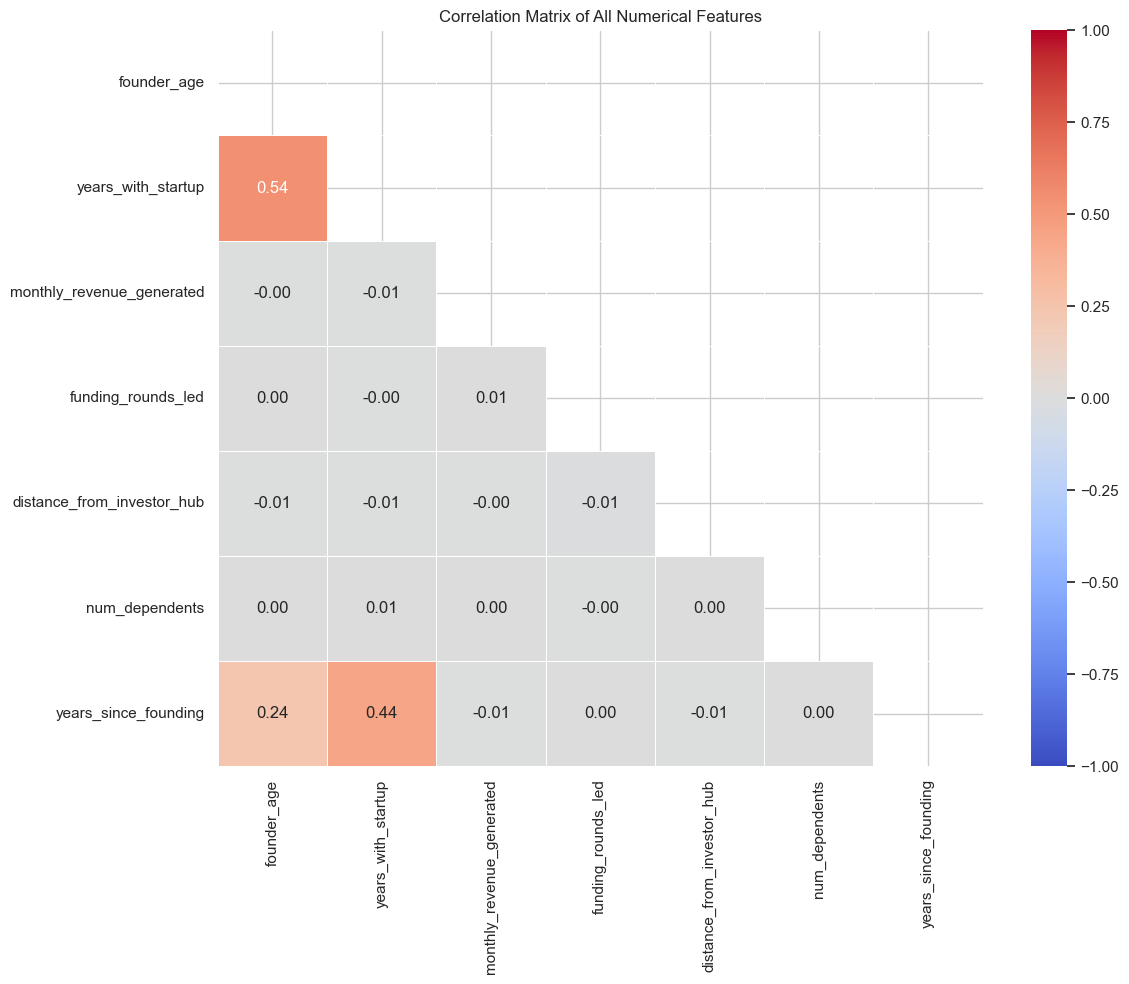


      2. COMPARING NUMERICAL INPUTS WITH OUTPUT
      (Look for shift in the box/median)


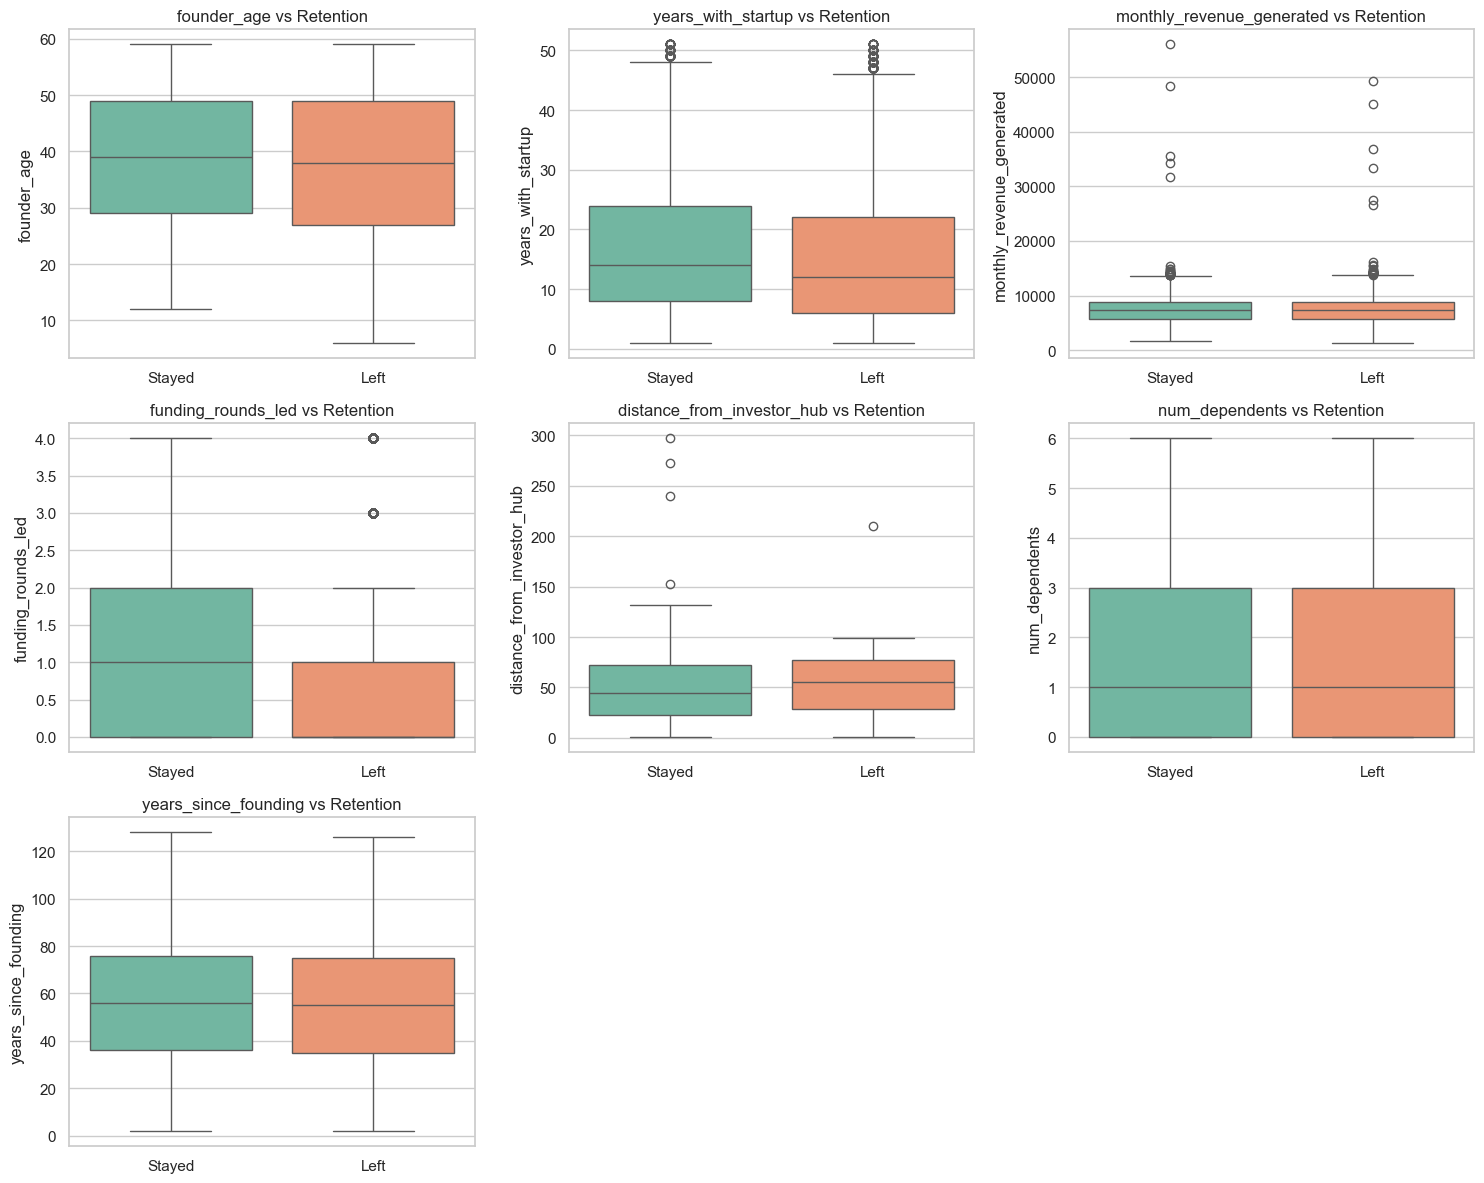


      3. COMPARING CATEGORICAL INPUTS WITH OUTPUT
      (Look for bars with different Red/Blue proportions)


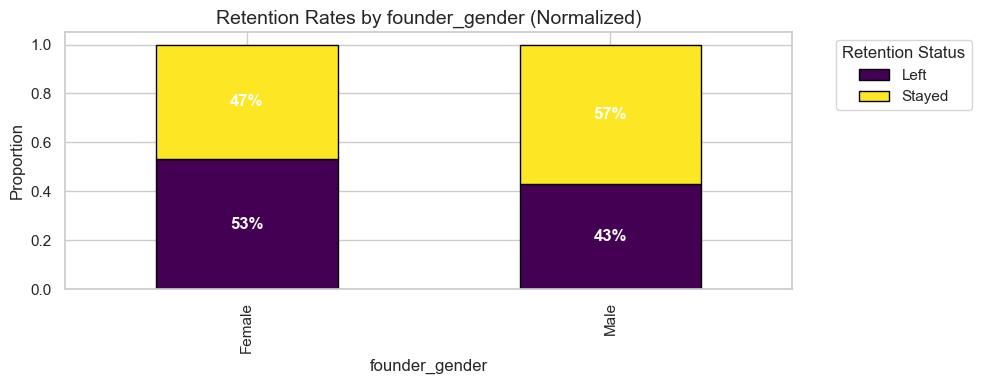

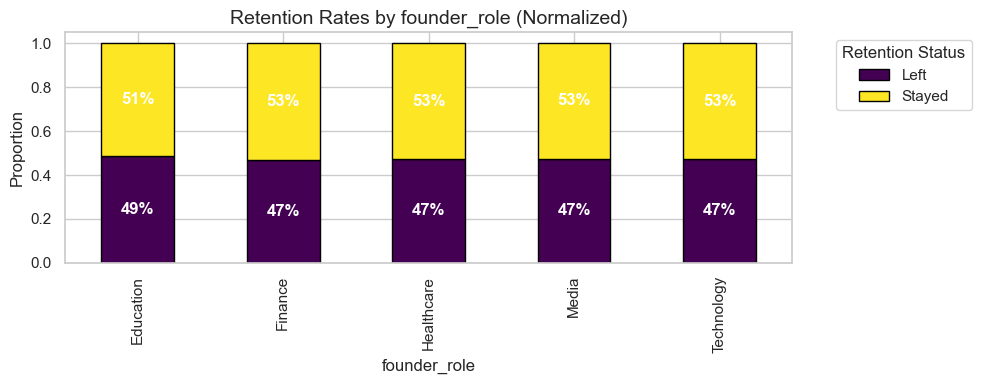

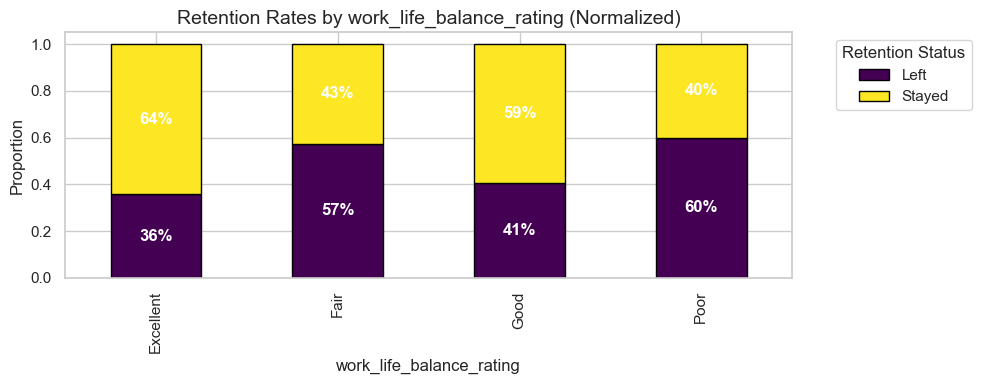

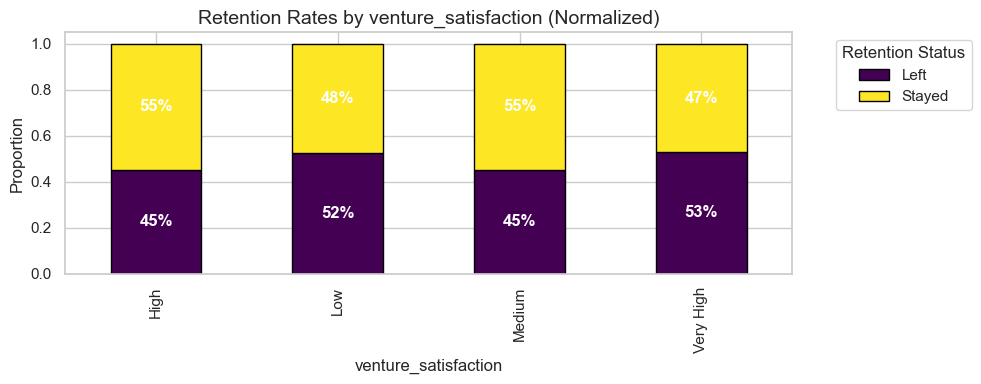

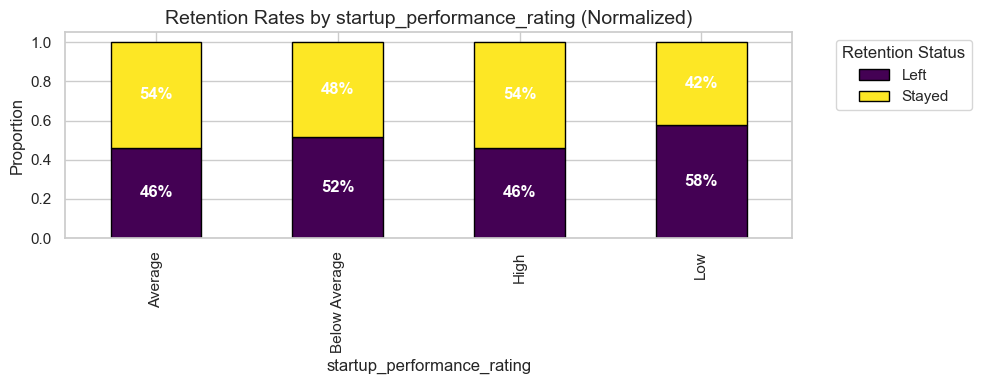

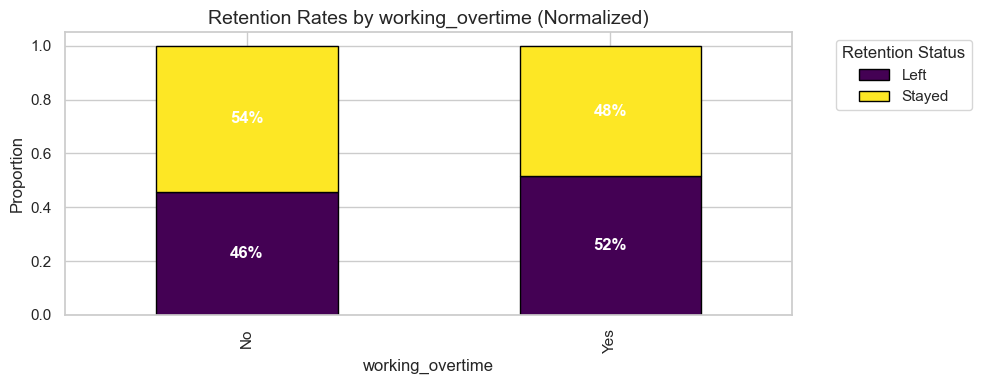

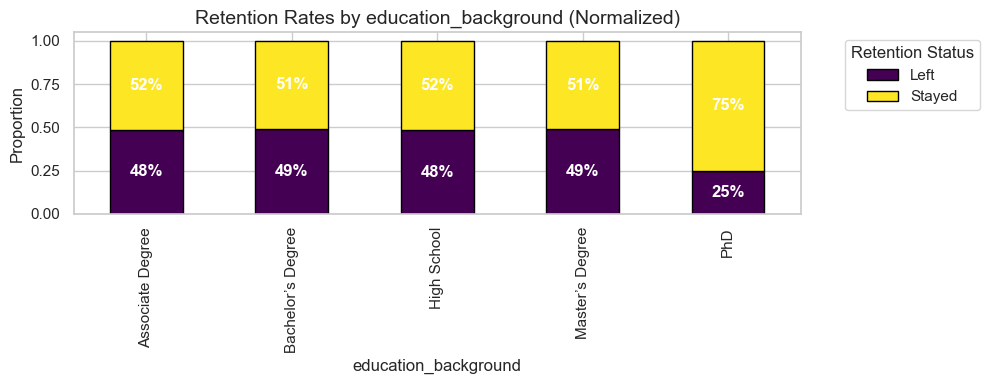

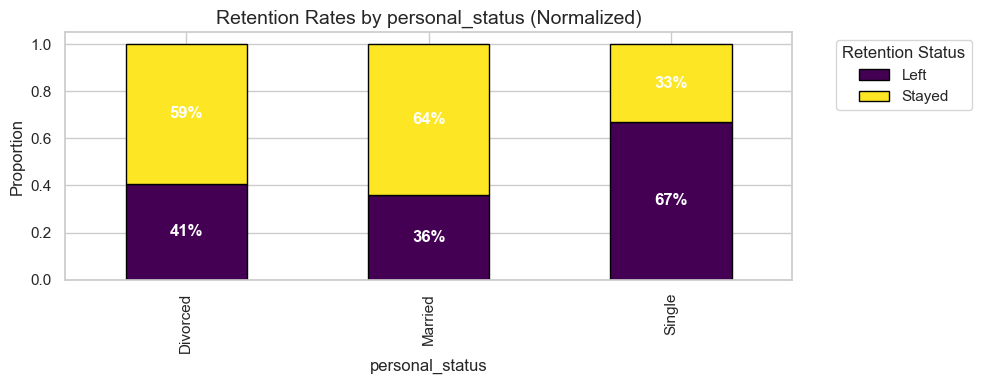

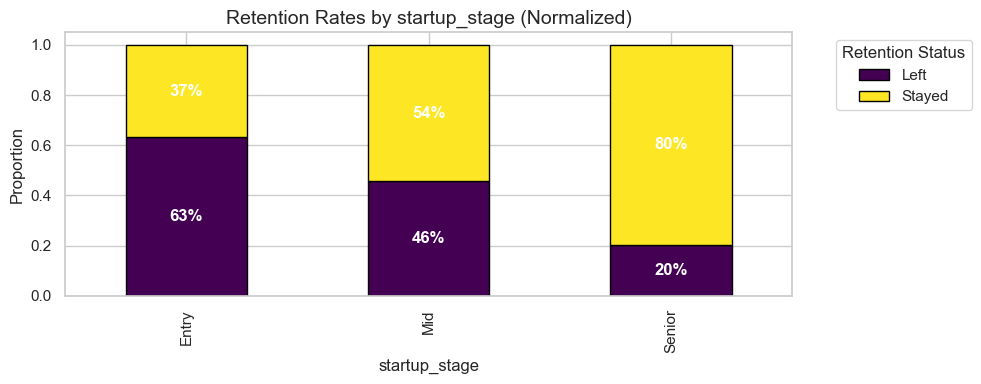

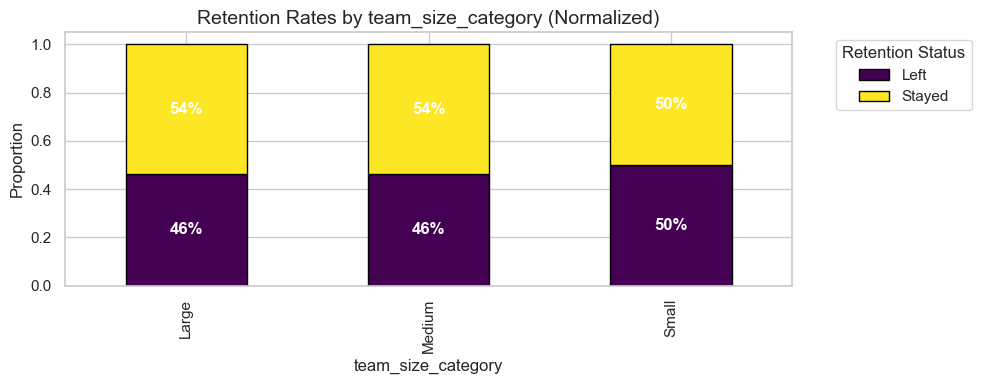

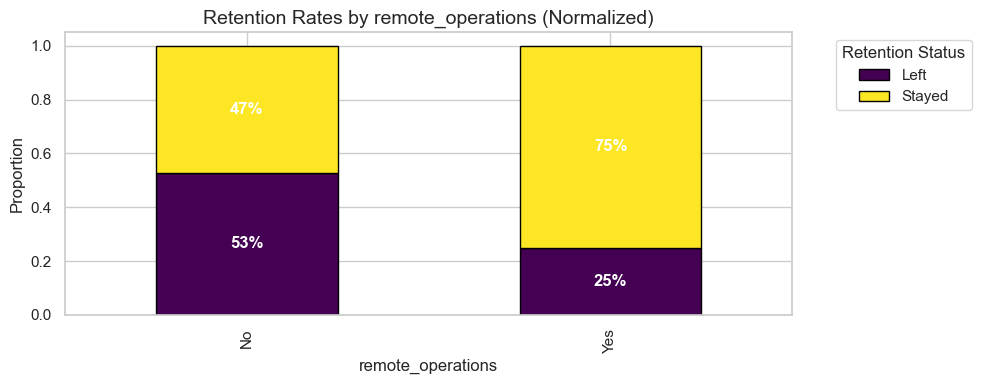

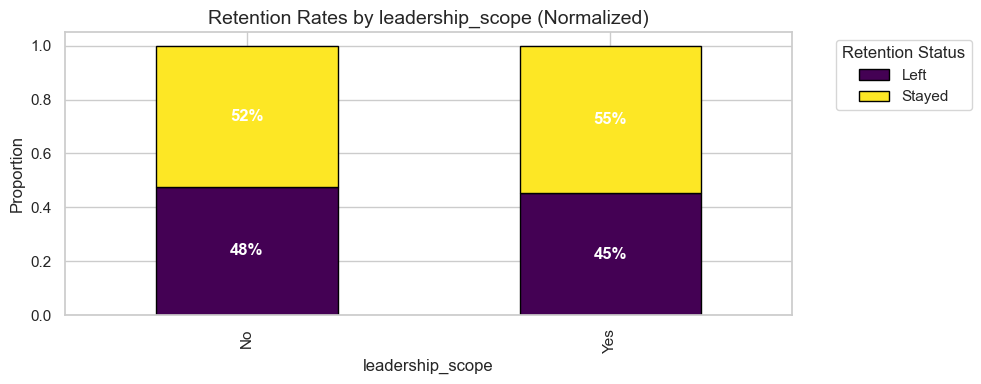

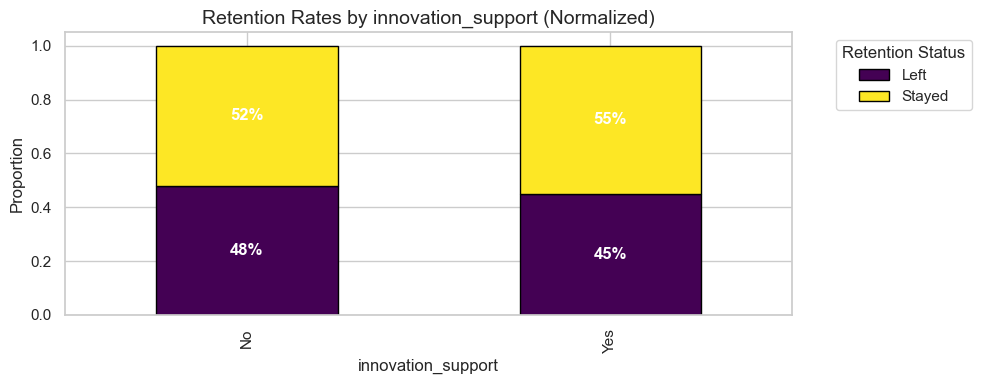

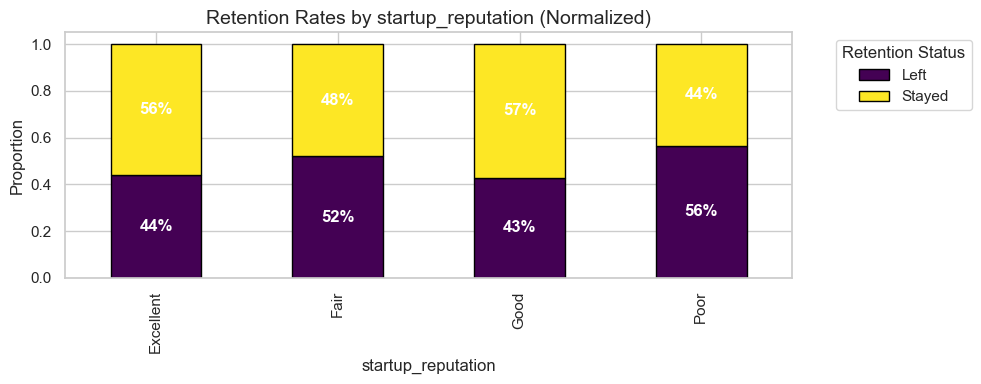

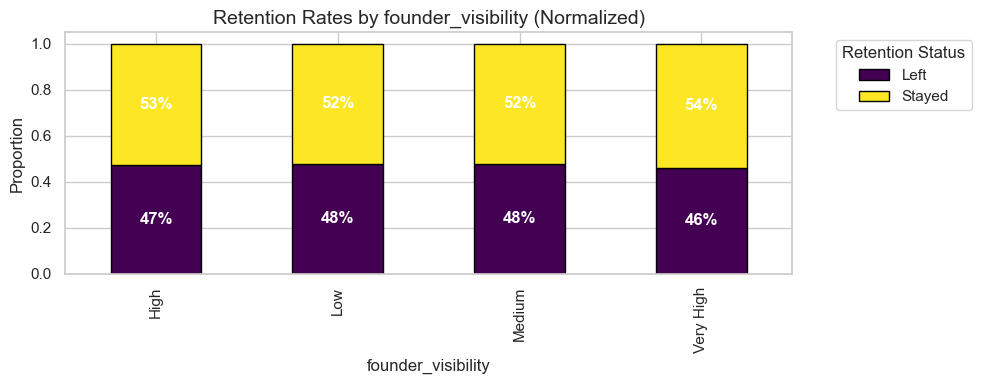

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style="whitegrid")
plt.rcParams['figure.max_open_warning'] = 50 

# Load Data
possible_paths = ['../data/train.csv', 'train.csv']
DATA_PATH = None
for path in possible_paths:
    if os.path.exists(path):
        DATA_PATH = path
        break

if DATA_PATH is None:
    print("❌ Error: 'train.csv' not found.")
else:
    print(f"✅ Data Loaded from {DATA_PATH}")
    df = pd.read_csv(DATA_PATH)

    
    print("\n" + "="*60)
    print("      1. MASTER CORRELATION HEATMAP")
    print("="*60)
    
    # Select only numbers
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    # Drop ID if present
    if 'founder_id' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['founder_id'])
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
    
    sns.heatmap(
        numeric_df.corr(), 
        mask=mask,
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        linewidths=0.5,
        vmin=-1, vmax=1
    )
    plt.title('Correlation Matrix of All Numerical Features')
    plt.tight_layout()
    plt.show()


    print("\n" + "="*60)
    print("      2. COMPARING NUMERICAL INPUTS WITH OUTPUT")
    print("      (Look for shift in the box/median)")
    print("="*60)

    # Get list of numerical cols again
    num_cols = numeric_df.columns.tolist()

    # Create a grid of plots
    # We will do 3 plots per row
    n_cols = 3
    n_rows = (len(num_cols) - 1) // n_cols + 1
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(num_cols):
        ax = plt.subplot(n_rows, n_cols, i+1)
        

        sns.boxplot(
            data=df, 
            x='retention_status', 
            y=col, 
            hue='retention_status', 
            palette='Set2', 
            legend=False,
            ax=ax
        )
        ax.set_title(f'{col} vs Retention')
        ax.set_xlabel('')
        
    plt.tight_layout()
    plt.show()


    print("\n" + "="*60)
    print("      3. COMPARING CATEGORICAL INPUTS WITH OUTPUT")
    print("      (Look for bars with different Red/Blue proportions)")
    print("="*60)

    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Remove target from inputs
    cat_cols = [c for c in cat_cols if c != 'retention_status']

    # Filter out columns with too many categories (like names or IDs)
    cat_cols = [c for c in cat_cols if df[c].nunique() < 20]

    for col in cat_cols:
        # Create a Crosstab (Contingency Table)
        cross_tab = pd.crosstab(df[col], df['retention_status'])
        
        # Calculate Proportions (Rows sum to 100%)
        # This is better than counts because it handles unequal group sizes
        cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0)
        
        # Plot
        ax = cross_tab_prop.plot(
            kind='bar', 
            stacked=True, 
            figsize=(10, 4), 
            colormap='viridis',
            edgecolor='black'
        )
        
        plt.title(f'Retention Rates by {col} (Normalized)', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='Retention Status', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add text labels for percentages
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            if height > 0.05: # Only show text if segment is big enough
                ax.text(x+width/2, 
                        y+height/2, 
                        '{:.0f}%'.format(height*100), 
                        horizontalalignment='center', 
                        verticalalignment='center',
                        color='white',
                        weight='bold')
        
        plt.tight_layout()
        plt.show()